In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('YesBank_StockPrices.csv')
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [4]:
df.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


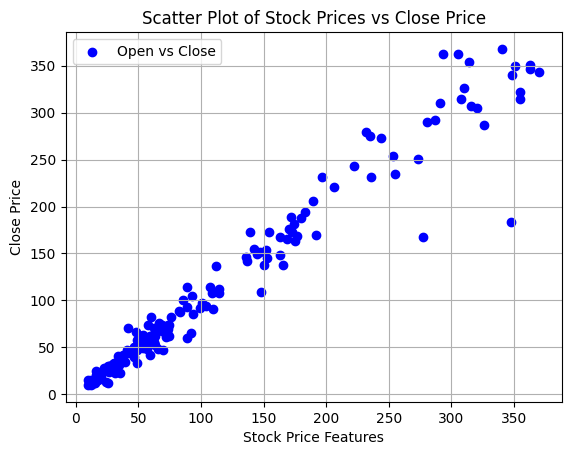

In [9]:
plt.scatter(df['Open'], df['Close'], color='blue', label='Open vs Close')
plt.xlabel('Stock Price Features')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Stock Prices vs Close Price')
plt.legend()
plt.grid(True)
plt.show()

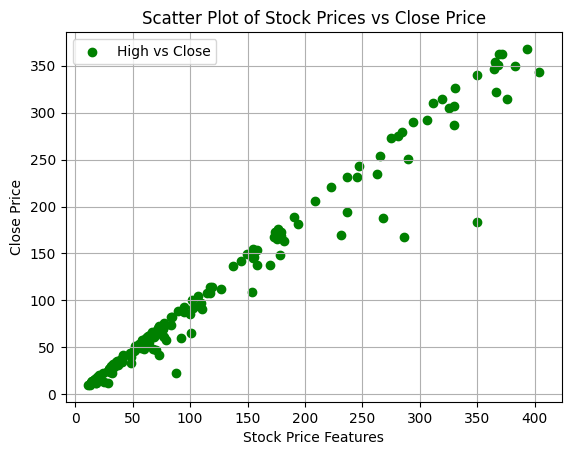

In [10]:
plt.scatter(df['High'], df['Close'], color='green', label='High vs Close')
plt.xlabel('Stock Price Features')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Stock Prices vs Close Price')
plt.legend()
plt.grid(True)
plt.show()

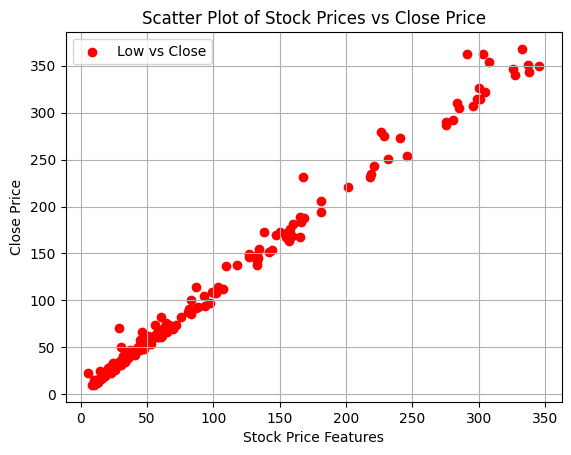

In [11]:
plt.scatter(df['Low'], df['Close'], color='red', label='Low vs Close')
plt.xlabel('Stock Price Features')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Stock Prices vs Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X = df.drop(['Close','Date'],axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print(y_pred)
# print(y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 34.77489805611885
R^2 Score: 0.9970968688142114
